In [ ]:
# Install relevant libraries
!pip install numpy matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Main parameters for algorithm
n_points = 5000 # total data points
n_arms = 10   # number of arms
n_features = 30 # number of features


In [4]:
context=np.random.random( (n_points,n_features))-0.5            # Context  Matrix (data)
theta=np.random.random( (n_arms,n_features) ) - 0.5      # real theta, what we will try to guess

P=context.dot(theta.T)

optimal=np.array(P.argmax(axis=1), dtype=int)
#plt.title("Distribution of ideal arm choices")
#plt.hist(optimal,bins=range(0,n_arms));

## Creating Synthetic Data

In [5]:
eps = 0.2
choices = np.zeros(n_points)
rewards = np.zeros(n_points)
explore = np.zeros(n_points)
norms   = np.zeros(n_points)

b = np.zeros((n_arms,n_features))
#b = np.zeros_like(theta)
A  = np.zeros((n_arms,n_features,n_features))

#print(temp.shape)
#print( ba.shape) 
#print(th.shape)

# Making Identity matrix for all new arms at initial times.
for i in range(n_arms):
    A[i] = np.identity(n_features)
    
theta_hat = np.zeros_like(theta) # Current best prediction
p = np.zeros(n_arms)   # Confidence Interval for arms.
alpha = 0.2 # constant to hold tight inequality.

for i in range(n_points):
    current_context = context[i]  # current context vector for t=i
    
    for a in range(n_arms):
        inv_A = np.linalg.inv(A[a])   # inverse of matrix A
        theta_hat[a] = inv_A.dot(b[a])  # Calculating theta_hat
        variance = current_context.dot(inv_A).dot(current_context)
        a_upper_ci = alpha*np.sqrt(variance)  # Upper confidence interval
        a_mean = theta_hat[a].dot(current_context)
        p[a] = a_mean + a_upper_ci
        
    norms[i]       = np.linalg.norm(theta_hat - theta,'fro')    # diagnostic, are we converging ?
        
    # Let's not be biased with tiebreaks, but add in some random noise
    p= p + ( np.random.random(len(p)) * 0.000001)
    choices[i] = p.argmax()   # choose the highest, line 11
    rewards[i] = theta[int(choices[i])].dot(current_context)    # Calculating reward for current context with selected arm choice[i]
    
    # Update A and b
    A[int(choices[i])] += np.outer(current_context,current_context)
    b[int(choices[i])] += rewards[i]*current_context

## LinUCB Algorithm with Disjoint Linear Models.

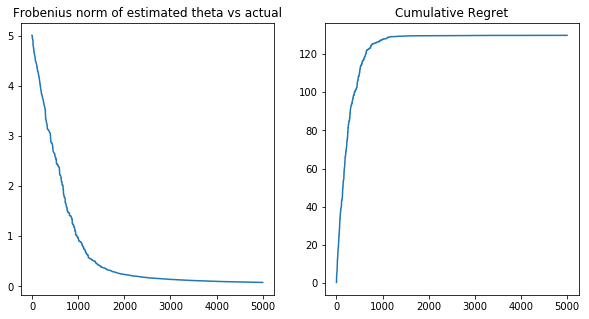

In [6]:
plt.figure(1,figsize=(10,5))
plt.subplot(121)
plt.plot(norms);
plt.title("Frobenius norm of estimated theta vs actual");

regret=(P.max(axis=1) - rewards)
plt.subplot(122)
plt.plot(regret.cumsum())
plt.title("Cumulative Regret");